### ABOUT COMPANY

LoanTap is an online platform committed to delivering customized loan products to millennials. They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen.

The data science team at LoanTap is building an underwriting layer to determine the creditworthiness of MSMEs as well as individuals.

LoanTap deploys formal credit to salaried individuals and businesses 4 main financial instruments:

    1. Personal Loan
    2. EMI Free Loan
    3. Personal Overdraft
    4. Advance Salary Loan

### PROBLEM STATEMENT

Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?

### IMPORT LIBRARIES

In [850]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr,f_oneway,chi2_contingency,shapiro,norm,kstest
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve, auc,
    plot_confusion_matrix, plot_roc_curve,ConfusionMatrixDisplay, precision_recall_curve
)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.impute import KNNImputer
from category_encoders import TargetEncoder
from scipy.stats import chi2_contingency
from imblearn.over_sampling import SMOTE
warnings.filterwarnings('ignore')

### IMPORT DATASET

In [851]:
df=pd.read_csv(r"logistic_regression.csv")

### DATA EXPLORATION

In [852]:
#First 5 rows#

df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


1. **loan_amnt** : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
2. **term**: The number of payments on the loan. Values are in months and can be either 36 or 60.
3. **int_rate** : Interest Rate on the loan
4. **installment** : The monthly payment owed by the borrower if the loan originates.
5. **grade** : LoanTap assigned loan grade
6. **sub_grade** : LoanTap assigned loan subgrade
7. **emp_title** :The job title supplied by the Borrower when applying for the loan.*
8. **emp_length** : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
9. **home_ownership** : The home ownership status provided by the borrower during registration or obtained from the credit report.
10. **annual_inc** : The self-reported annual income provided by the borrower during registration.
11. **verification_status** : Indicates if income was verified by LoanTap, not verified, or if the income source was verified
12. **issue_d** : The month which the loan was funded
13. **loan_status** : Current status of the loan - Target Variable
14. **purpose** : A category provided by the borrower for the loan request.
15. **title** : The loan title provided by the borrower
16. **dti** : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LoanTap loan, divided by the borrower’s self-reported monthly income.
17. **earliest_cr_line** :The month the borrower's earliest reported credit line was opened
18. **open_acc** : The number of open credit lines in the borrower's credit file.
19. **pub_rec** : Number of derogatory public records
20. **revol_bal** : Total credit revolving balance
21. **revol_util** : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
22. **total_acc** : The total number of credit lines currently in the borrower's credit file
23. **initial_list_status** : The initial listing status of the loan. Possible values are – W, F
24. **application_type** : Indicates whether the loan is an individual application or a joint application with two co-borrowers
25. **mort_acc** : Number of mortgage accounts.
26. **pub_rec_bankruptcies** : Number of public record bankruptcies
27. **Address**: Address of the individual

In [853]:
df.shape

(396030, 27)

There are around 396000 data points and 27 features in the dataset

In [854]:
#Info on datatypes of features, count of non null data points#

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [855]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [856]:
#Count of null values in each column#

df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

There are null values present in 6 columns

In [857]:
#Count of unique values in each columns#

count_of_unique=[]
columns_=[]
for i in df.columns:
    columns_.append(i)
    count_of_unique.append(df[i].nunique())
pd.DataFrame({'Columns':columns_,'Count of Columns':count_of_unique})

,Columns,Count of Columns
0,loan_amnt,1397
1,term,2
2,int_rate,566
3,installment,55706
4,grade,7
5,sub_grade,35
6,emp_title,173105
7,emp_length,11
8,home_ownership,6
9,annual_inc,27197


* There are 173105, 48817 & 393700 unique items respectively in emp_title, title & address column. For further analysis, these columns are dropped because there is no value addition in encoding these categorical datas

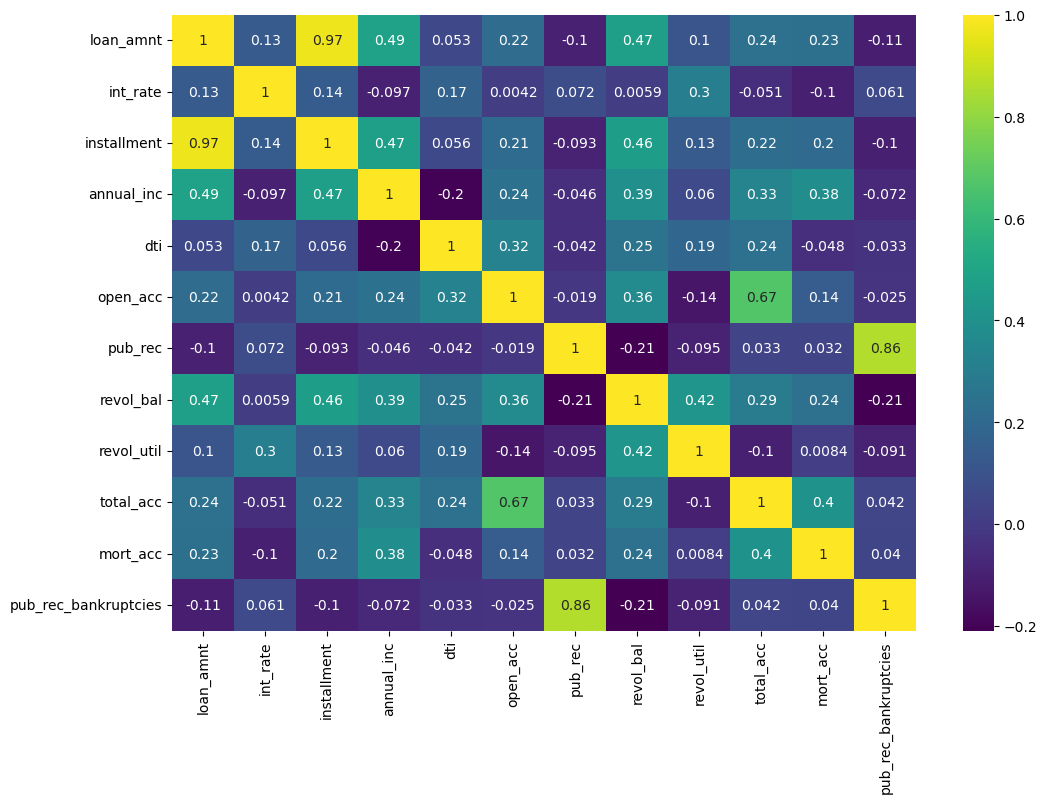

In [858]:
#Correlation heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(method='spearman'), annot=True, cmap='viridis')
plt.show()

**Spearman** method is used since the interest is on checking the correlation between 2 features and understand whether if one feature changes, how well the other features changes. The change may be non linear<br>
**Pearson** to be used when there is a linear correlation between the features

Installments and loan_amount is having very high correlation of 0.97. So one of the feature can be removed<br>
In this case, installment feature is removed

In [859]:
#Drop installment column

df.drop(columns=['installment'], axis=1, inplace=True)

In [860]:
#loan_status vs loan_amount

df.groupby(by='loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


* Close to 3.2 lakh people (80%) paid back their loan while 78k loans (20%) were charged off
* The mean charged off loan amount is higher than the fully paid loan amount by 9%
* Mean is more than the median in both loan_status which means the distribution is right tailed

In [870]:
#loan_status vs dti

df.groupby(by='loan_status')['dti'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,19.656346,36.781068,0.0,13.33,19.34,25.55,9999.0
Fully Paid,318357.0,16.824010,8.500979,0.0,10.87,16.34,22.29,1622.0


* Those with higher dti has higher chances of being a defaulter
* Variance is higher for the defaulters. Confidence interval of Defaulters and Non defaulters will be overlapping and hence one cannot be exactly differentiated from the other only with 'dti' feature
* Mean is equal to the median in both categories and hence the distribution will be symmetrical and there will less number of outliers

In [878]:
#loan_status vs interest rate

df.groupby(by='loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15.882587,4.388135,5.32,12.99,15.61,18.64,30.99
Fully Paid,318357.0,13.092105,4.319105,5.32,9.91,12.99,15.61,30.99


* Interest rates for defaulters are higher than non defaulters
* Less outliers are present due to symmetrical distribution

In [879]:
#loan_status vs Annual income

df.groupby(by='loan_status')['annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,67535.537710,58303.457136,0.0,42000.00,59000.0,80000.0,8706582.0
Fully Paid,318357.0,75829.951566,62315.991907,600.0,46050.53,65000.0,90000.0,7600000.0


* Annual income for defaulters are lower than non defaulters
* Distribution is right tailed

In [861]:
#Splitup of home ownership

df['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

90% of people have home ownership as Mortgage and Rent

In [862]:
df.loc[(df['home_ownership'] == 'ANY') | (df['home_ownership'] == 'NONE'),'home_ownership'] = 'OTHER'
df['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: home_ownership, dtype: int64

Minority classes are combined under "OTHER" 

In [863]:
#Drop the columns#

df.drop(['emp_title', 'title'],inplace=True,axis=1)

'emp_title', 'title columns are dropped from analysis since there are 50k + unique values in the columns and it is not adding much value 

In [864]:
#Extract zip code from address and delete address column

df['zip']=df['address'].apply(lambda x:x[-5:])
df.drop('address',inplace=True,axis=1)

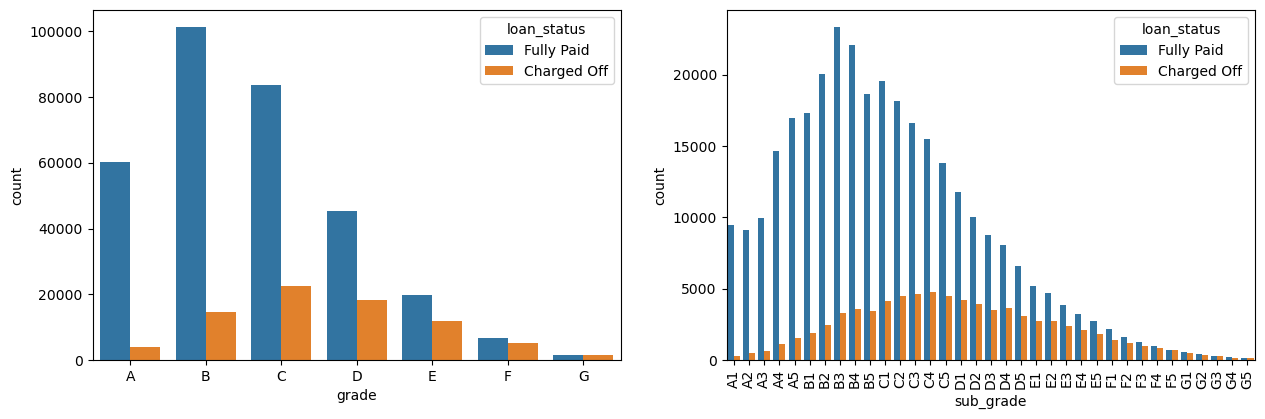

In [865]:
# Grade / sub grade vs loan_status

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(df['grade'].unique().tolist())
sns.countplot(x='grade', data=df, hue='loan_status', order=grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(df['sub_grade'].unique().tolist())
g = sns.countplot(x='sub_grade', data=df, hue='loan_status', order=sub_grade)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

People under 'B' grade and 'B3' sub grade has higher chance of paying back the loan

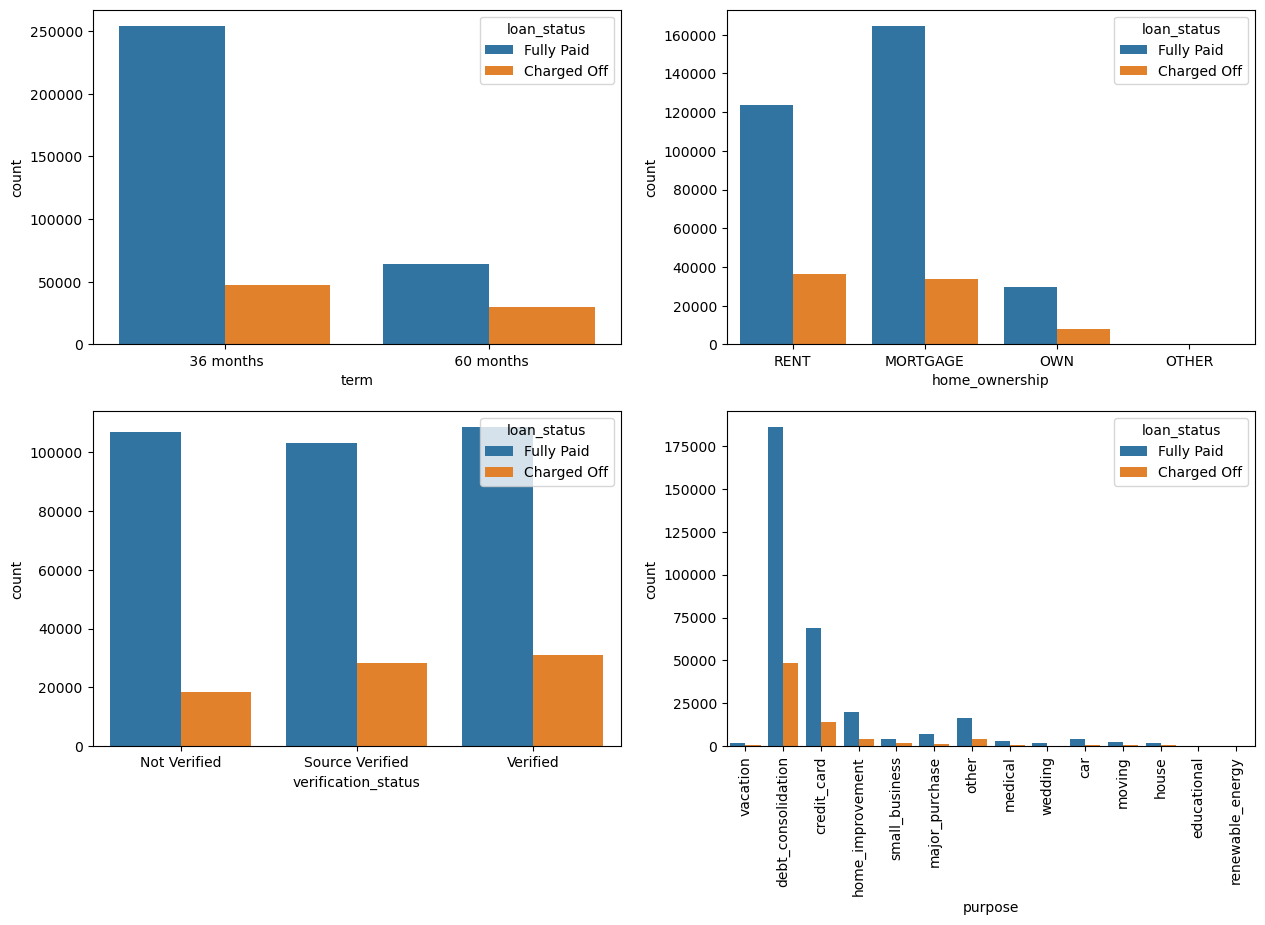

In [866]:
# term / home ownership / verification status / purpose vs loan_status

plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 1)
sns.countplot(x='term', data=df, hue='loan_status')

plt.subplot(4, 2, 2)
sns.countplot(x='home_ownership', data=df, hue='loan_status')

plt.subplot(4, 2, 3)
sns.countplot(x='verification_status', data=df, hue='loan_status')

plt.subplot(4, 2, 4)
g = sns.countplot(x='purpose', data=df, hue='loan_status')
g.set_xticklabels(g.get_xticklabels(), rotation=90);

People with '36 month loan term', home ownership of 'Mortgage' or 'Rent' , purpose of 'debt consolidation' or 'credit cards' has higher chance of paying pack the loan

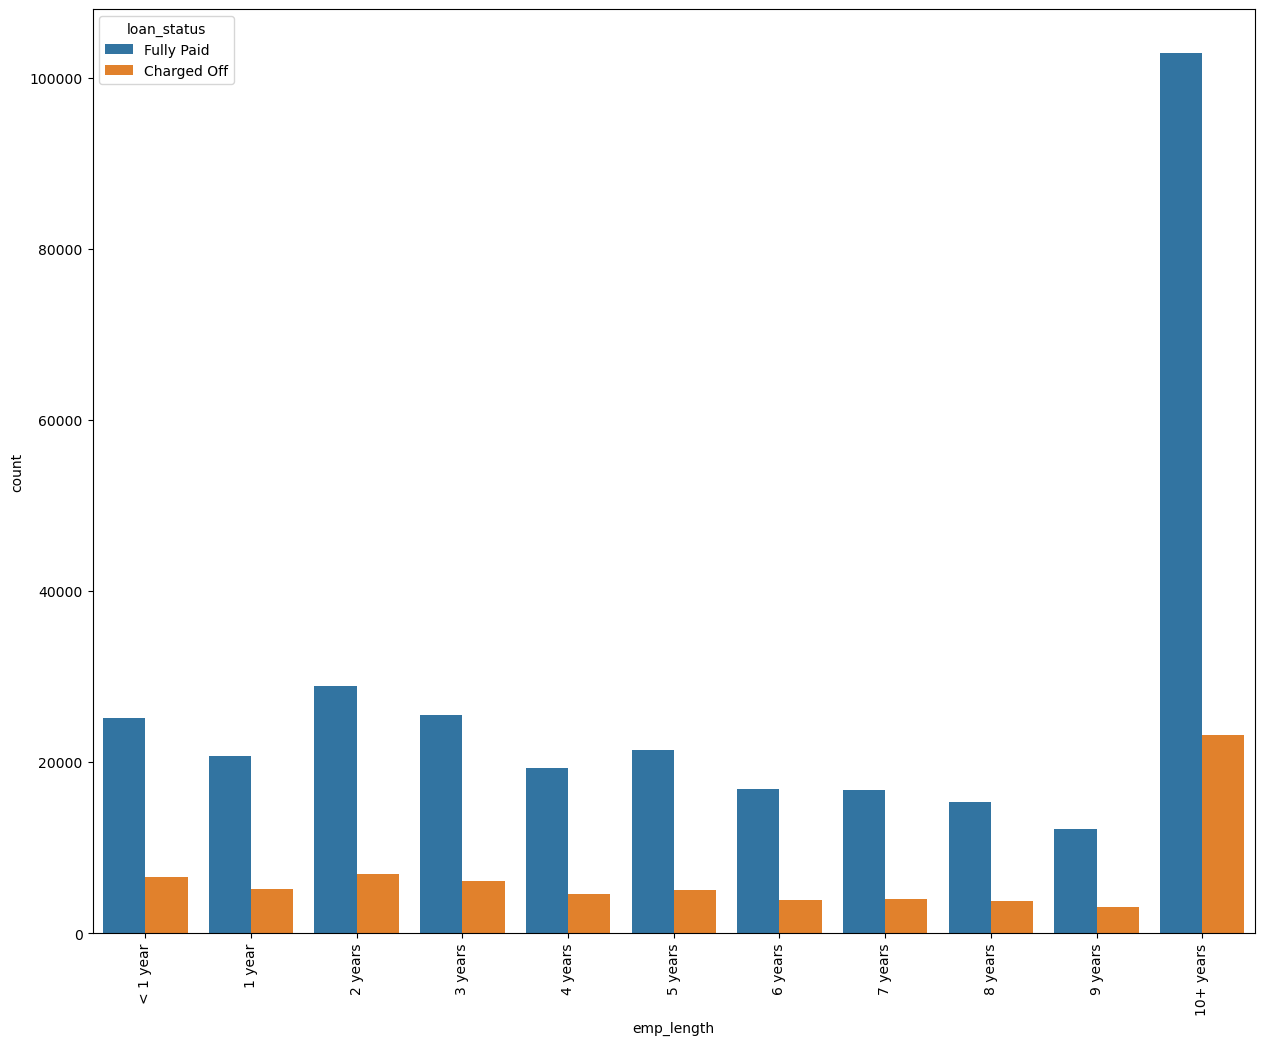

In [867]:
# Emp_length vs loan_status

plt.figure(figsize=(15, 12))

order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years',
          '6 years', '7 years', '8 years', '9 years', '10+ years',]
g = sns.countplot(x='emp_length', data=df, hue='loan_status', order=order)
g.set_xticklabels(g.get_xticklabels(), rotation=90);



People with 10+ years of work experience have higher chance of paying back the loan

### DATA PREPROCESSING

**Update loan_status column**

In [628]:
df['loan_status'].value_counts()

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

In [629]:
#Encode loan_status column as per the dictionary{'Fully Paid':0,'Charged Off':1}#

df['loan_status']=df['loan_status'].map({'Fully Paid':0,'Charged Off':1})

#Update data type of loan_status column to integer type#

df['loan_status']=df['loan_status'].astype('int64')

**Update term column**

In [630]:
df['term'].value_counts()

 36 months    302005
 60 months     94025
Name: term, dtype: int64

In [631]:
#crosstab for hypothesis testing ( Chisquare )

a=pd.crosstab(index=df['term'],columns=df['loan_status'])
a

loan_status,0,1
term,,
36 months,254365,47640
60 months,63992,30033


In [632]:
#Chisquare test

chi_stat,p_val,dof,expected_val=chi2_contingency(a)

if p_val<0.05:
    print('The feature is significant')
    print(p_val)
else:
    print('The feature is not significant')
    print(p_val)

The feature is significant
0.0


In [633]:
#Perform onehotencoding

df = pd.get_dummies(df, columns=['term'], drop_first=True)

**Update grade column**

In [634]:
df['grade'].value_counts()

B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: grade, dtype: int64

In [635]:
#crosstab for hypothesis testing ( Chisquare )

b=pd.crosstab(index=df['grade'],columns=df['loan_status'])
b

loan_status,0,1
grade,,
A,60151,4036
B,101431,14587
C,83538,22449
D,45186,18338
E,19723,11765
F,6735,5037
G,1593,1461


In [636]:
#Chisquare test

chi_stat,p_val,dof,expected_val=chi2_contingency(b)

if p_val<0.05:
    print('The feature is significant')
    print(p_val)
else:
    print('The feature is not significant')
    print(p_val)

The feature is significant
0.0


In [637]:
#Perform target encoding

te=TargetEncoder()
df['grade']=te.fit_transform(df['grade'],df['loan_status'])

**Update sub_grade column**

In [638]:
df['sub_grade'].value_counts()

B3    26655
B4    25601
C1    23662
C2    22580
B2    22495
B5    22085
C3    21221
C4    20280
B1    19182
A5    18526
C5    18244
D1    15993
A4    15789
D2    13951
D3    12223
D4    11657
A3    10576
A1     9729
D5     9700
A2     9567
E1     7917
E2     7431
E3     6207
E4     5361
E5     4572
F1     3536
F2     2766
F3     2286
F4     1787
F5     1397
G1     1058
G2      754
G3      552
G4      374
G5      316
Name: sub_grade, dtype: int64

In [639]:
#crosstab for hypothesis testing ( Chisquare )

c=pd.crosstab(index=df['sub_grade'],columns=df['loan_status'])
c

loan_status,0,1
sub_grade,,
A1,9450,279
A2,9106,461
A3,9962,614
A4,14680,1109
A5,16953,1573
B1,17291,1891
B2,20054,2441
B3,23367,3288
B4,22058,3543


In [640]:
#Chisquare test

chi_stat,p_val,dof,expected_val=chi2_contingency(c)

if p_val<0.05:
    print('The feature is significant')
    print(p_val)
else:
    print('The feature is not significant')
    print(p_val)

The feature is significant
0.0


In [641]:
#Perform target encoding

te=TargetEncoder()
df['sub_grade']=te.fit_transform(df['sub_grade'],df['loan_status'])

**Update emp_length column**

In [642]:
df['emp_length'].value_counts()

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

In [643]:
#crosstab for hypothesis testing ( Chisquare )

d=pd.crosstab(index=df['emp_length'],columns=df['loan_status'])
d

loan_status,0,1
emp_length,,
1 year,20728,5154
10+ years,102826,23215
2 years,28903,6924
3 years,25483,6182
4 years,19344,4608
5 years,21403,5092
6 years,16898,3943
7 years,16764,4055
8 years,15339,3829


In [644]:
#Chisquare test

chi_stat,p_val,dof,expected_val=chi2_contingency(d)

if p_val<0.05:
    print('The feature is significant')
    print(p_val)
else:
    print('The feature is not significant')
    print(p_val)

The feature is significant
1.88404995201913e-21


In [645]:
#Update emp_length column ( ex : 10+ years ----> 10 years, < 1 year----> 1 years )#

df['emp_length'].replace('10+ years','10 years',inplace=True)
df['emp_length'].replace('< 1 year','0 years',inplace=True)

#Update emp_length column ( ex : 2 years ----> 2 )#

df['emp_length'][df['emp_length'].isna()==False]=df['emp_length'][df['emp_length'].isna()==False].apply(lambda x:x.split()[0])

#Update data type of emp_length column to integer type#

df['emp_length'][df['emp_length'].isna()==False]=df['emp_length'][df['emp_length'].isna()==False].astype('float64')

df['emp_length']=df['emp_length'].apply(lambda x:x)

In [646]:
df['emp_length'].value_counts()

10.0    126041
2.0      35827
0.0      31725
3.0      31665
5.0      26495
1.0      25882
4.0      23952
6.0      20841
7.0      20819
8.0      19168
9.0      15314
Name: emp_length, dtype: int64

In [647]:
#Perform target encoding

te=TargetEncoder()
df['emp_length']=te.fit_transform(df['emp_length'],df['loan_status'])

**Update home_ownership column**

In [648]:
df['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: home_ownership, dtype: int64

In [649]:
#crosstab for hypothesis testing ( Chisquare )

e=pd.crosstab(index=df['home_ownership'],columns=df['loan_status'])
e

loan_status,0,1
home_ownership,,
MORTGAGE,164716,33632
OTHER,123,23
OWN,29940,7806
RENT,123578,36212


In [650]:
#Chisquare test

chi_stat,p_val,dof,expected_val=chi2_contingency(e)

if p_val<0.05:
    print('The feature is significant')
    print(p_val)
else:
    print('The feature is not significant')
    print(p_val)

The feature is significant
0.0


In [651]:
#Perform onehotencoding

df = pd.get_dummies(df, columns=['home_ownership'], drop_first=True)

**Update verification_status column**

In [652]:
df['verification_status'].value_counts()

Verified           139563
Source Verified    131385
Not Verified       125082
Name: verification_status, dtype: int64

In [653]:
#crosstab for hypothesis testing ( Chisquare )

f=pd.crosstab(index=df['verification_status'],columns=df['loan_status'])
f

loan_status,0,1
verification_status,,
Not Verified,106775,18307
Source Verified,103171,28214
Verified,108411,31152


In [654]:
#Chisquare test

chi_stat,p_val,dof,expected_val=chi2_contingency(f)

if p_val<0.05:
    print('The feature is significant')
    print(p_val)
else:
    print('The feature is not significant')
    print(p_val)

The feature is significant
0.0


In [655]:
#Perform onehotencoding

df = pd.get_dummies(df, columns=['verification_status'], drop_first=True)

**Update issue_d column**

Since issue_d or loan issue date column will not make sense for new customers because the data on which the model will be trained will be the years in the past and it wont be present in the test data. so it will affect the accuracy of the model and hence it is removed from further analysis

In [656]:
df['issue_d'].value_counts()

Oct-2014    14846
Jul-2014    12609
Jan-2015    11705
Dec-2013    10618
Nov-2013    10496
            ...  
Jul-2007       26
Sep-2008       25
Nov-2007       22
Sep-2007       15
Jun-2007        1
Name: issue_d, Length: 115, dtype: int64

In [657]:
df.drop('issue_d',axis=1,inplace=True)

**Update purpose column**

In [658]:
df['purpose'].value_counts()

debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: purpose, dtype: int64

In [659]:
#crosstab for hypothesis testing ( Chisquare )

f=pd.crosstab(index=df['purpose'],columns=df['loan_status'])
f

loan_status,0,1
purpose,,
car,4064,633
credit_card,69145,13874
debt_consolidation,185867,48640
educational,215,42
home_improvement,19943,4087
house,1767,434
major_purchase,7342,1448
medical,3285,911
moving,2184,670


In [660]:
#Chisquare test

chi_stat,p_val,dof,expected_val=chi2_contingency(f)

if p_val<0.05:
    print('The feature is significant')
    print(p_val)
else:
    print('The feature is not significant')
    print(p_val)

The feature is significant
6.573354783158025e-291


In [661]:
#Perform target encoding

te=TargetEncoder()
df['purpose']=te.fit_transform(df['purpose'],df['loan_status'])

**Update earliest_cr_line column**

In [662]:
#Convert data type of earliest_cr_line column to datetime

df['earliest_cr_line']=pd.to_datetime(df['earliest_cr_line'])

#Extract Month

df['earliest_cr_line_months']=df['earliest_cr_line'].dt.month

#Extract Year

df['earliest_cr_line_years']=df['earliest_cr_line'].dt.year

In [663]:
#Crosstab for years vs loan_status

g=pd.crosstab(index=df['earliest_cr_line_years'],columns=df['loan_status'])
g

loan_status,0,1
earliest_cr_line_years,,
1944,0,1
1948,1,0
1950,3,0
1951,2,1
1953,2,0
...,...,...
2009,2852,1022
2010,2295,861
2011,1556,577


In [664]:
#Chisquare test

chi_stat,p_val,dof,expected_val=chi2_contingency(g)

if p_val<0.05:
    print('The feature is significant')
    print(p_val)
else:
    print('The feature is not significant')
    print(p_val)

The feature is significant
6.10476618638809e-198


In [665]:
h=pd.crosstab(index=df['earliest_cr_line_months'],columns=df['loan_status'])
h

loan_status,0,1
earliest_cr_line_months,,
1,24681,6013
2,23365,5678
3,25276,6341
4,23388,5843
5,24389,6056
6,24537,5908
7,25637,6335
8,29977,7372
9,30349,7324


In [666]:
#Chisquare test

chi_stat,p_val,dof,expected_val=chi2_contingency(h)

if p_val<0.05:
    print('The feature is significant')
    print(p_val)
else:
    print('The feature is not significant')
    print(p_val)

The feature is not significant
0.09441118313230627


* Year of earliest credit line is significant and month is not significant
* Since year column will not make sense for new customers because the data on which the model will be trained will be the years in the past and it wont be present in the test data. so it will affect the accuracy of the model
* So the earliest_cr_line column is removed

In [667]:
df.drop(['earliest_cr_line','earliest_cr_line_months','earliest_cr_line_years'],axis=1,inplace=True)

**Update pub_rec, mort_acc, pub_rec_bankruptcies columns**

In [668]:
for i in ['pub_rec', 'mort_acc', 'pub_rec_bankruptcies']:
    print(df[i].value_counts())

0.0     338272
1.0      49739
2.0       5476
3.0       1521
4.0        527
5.0        237
6.0        122
7.0         56
8.0         34
9.0         12
10.0        11
11.0         8
13.0         4
12.0         4
19.0         2
40.0         1
17.0         1
86.0         1
24.0         1
15.0         1
Name: pub_rec, dtype: int64
0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64
0.0    350380
1.0     42790
2.0      1847
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: pub_rec_bankrupt

Feature Engineering:

1. Since there are large number of datapoints with '0' as the value in the 3 columns, it will create a bias towards '0'
2. Therefore the columns will be updated in such a way that if value is greater than '1', it is '1' else it is '0'
3. Also it is logical that it only matters whether there is any derogatory public records / mortgage accounts / bankruptcies or not. It doesnt actually matter on how many such cases are there

In [669]:
#Function to return '1' if the value is >=1 else return 0

def func(x):
    if x>=1:
        return 1
    else:
        return 0
    
df['pub_rec']=df['pub_rec'].apply(func)
df['mort_acc']=df['mort_acc'].apply(func)
df['pub_rec_bankruptcies']=df['pub_rec_bankruptcies'].apply(func)

**Update initial_list_status column**

In [670]:
df['initial_list_status'].value_counts()

f    238066
w    157964
Name: initial_list_status, dtype: int64

In [671]:
i=pd.crosstab(index=df['initial_list_status'],columns=df['loan_status'])
i

loan_status,0,1
initial_list_status,,
f,192105,45961
w,126252,31712


In [672]:
#Chisquare test

chi_stat,p_val,dof,expected_val=chi2_contingency(i)

if p_val<0.05:
    print('The feature is significant')
    print(p_val)
else:
    print('The feature is not significant')
    print(p_val)

The feature is significant
2.408916483118551e-09


In [673]:
#Perform onehotencoding

df = pd.get_dummies(df, columns=['initial_list_status'], drop_first=True)

**Update application_type column**

In [674]:
df['application_type'].value_counts()

INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

In [675]:
j=pd.crosstab(index=df['application_type'],columns=df['loan_status'])
j

loan_status,0,1
application_type,,
DIRECT_PAY,184,102
INDIVIDUAL,317802,77517
JOINT,371,54


In [676]:
#Chisquare test

chi_stat,p_val,dof,expected_val=chi2_contingency(j)

if p_val<0.05:
    print('The feature is significant')
    print(p_val)
else:
    print('The feature is not significant')
    print(p_val)

The feature is significant
1.1418557766942247e-13


In [677]:
#Perform onehotencoding

df = pd.get_dummies(df, columns=['application_type'], drop_first=True)

**Update zip column**

In [678]:
df['zip'].value_counts()

70466    56985
30723    56546
22690    56527
48052    55917
00813    45824
29597    45471
05113    45402
11650    11226
93700    11151
86630    10981
Name: zip, dtype: int64

In [679]:
k=pd.crosstab(index=df['zip'],columns=df['loan_status'])
k

loan_status,0,1
zip,,
00813,45824,0
05113,45402,0
11650,0,11226
22690,45573,10954
29597,45471,0
30723,45525,11021
48052,44725,11192
70466,45837,11148
86630,0,10981


In [680]:
#Chisquare test

chi_stat,p_val,dof,expected_val=chi2_contingency(k)

if p_val<0.05:
    print('The feature is significant')
    print(p_val)
else:
    print('The feature is not significant')
    print(p_val)

The feature is significant
0.0


In [681]:
#Perform target encoding

te=TargetEncoder()
df['zip']=te.fit_transform(df['zip'],df['loan_status'])

In [682]:
df.columns

Index(['loan_amnt', 'int_rate', 'grade', 'sub_grade', 'emp_length',
       'annual_inc', 'loan_status', 'purpose', 'dti', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'zip', 'term_ 60 months',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'initial_list_status_w', 'application_type_INDIVIDUAL',
       'application_type_JOINT'],
      dtype='object')

In [683]:
df.shape

(396030, 26)

In [684]:
#Check the data type after pre processing

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 26 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            396030 non-null  float64
 1   int_rate                             396030 non-null  float64
 2   grade                                396030 non-null  float64
 3   sub_grade                            396030 non-null  float64
 4   emp_length                           377729 non-null  float64
 5   annual_inc                           396030 non-null  float64
 6   loan_status                          396030 non-null  int64  
 7   purpose                              396030 non-null  float64
 8   dti                                  396030 non-null  float64
 9   open_acc                             396030 non-null  float64
 10  pub_rec                              396030 non-null  int64  
 11  revol_bal    

In [685]:
# Count of null values in each columns

df.isnull().sum()

loan_amnt                                  0
int_rate                                   0
grade                                      0
sub_grade                                  0
emp_length                             18301
annual_inc                                 0
loan_status                                0
purpose                                    0
dti                                        0
open_acc                                   0
pub_rec                                    0
revol_bal                                  0
revol_util                               276
total_acc                                  0
mort_acc                                   0
pub_rec_bankruptcies                       0
zip                                        0
term_ 60 months                            0
home_ownership_OTHER                       0
home_ownership_OWN                         0
home_ownership_RENT                        0
verification_status_Source Verified        0
verificati

**Null Value imputation using KNN IMPUTER**

KNN Imputer is used because:
* Simple Mean/median/mode imputation is a univariate imputation method and does not consider multiple features at a time
* Since there are 25+ features present in the dataset, it is more logical to consider KNN Imputaion which considers multiple features into account and impute based on similarities 

In [686]:
#KNN Imputation

imputer=KNNImputer(n_neighbors=5,weights='distance')
df2=imputer.fit_transform(df)

In [687]:
#Convert to dataframe

df2=pd.DataFrame(df2,columns=df.columns)

In [688]:
df1=df2.copy()

In [689]:
#Check for null values

df1.isnull().sum()

loan_amnt                              0
int_rate                               0
grade                                  0
sub_grade                              0
emp_length                             0
annual_inc                             0
loan_status                            0
purpose                                0
dti                                    0
open_acc                               0
pub_rec                                0
revol_bal                              0
revol_util                             0
total_acc                              0
mort_acc                               0
pub_rec_bankruptcies                   0
zip                                    0
term_ 60 months                        0
home_ownership_OTHER                   0
home_ownership_OWN                     0
home_ownership_RENT                    0
verification_status_Source Verified    0
verification_status_Verified           0
initial_list_status_w                  0
application_type

### OUTLIER DETECTION

In [690]:
#Count of unique values in each columns#

count_of_unique=[]
columns_=[]
for i in df1.columns:
    columns_.append(i)
    count_of_unique.append(df1[i].nunique())
pd.DataFrame({'Columns':columns_,'Count of Columns':count_of_unique})

,Columns,Count of Columns
0,loan_amnt,1397
1,int_rate,566
2,grade,7
3,sub_grade,35
4,emp_length,18236
5,annual_inc,27197
6,loan_status,2
7,purpose,14
8,dti,4262
9,open_acc,61


In [691]:
#Select the columns where no of unique values are more than 10 
#assuming that those having less than 10 will behave like a categorical data

cols=[]
for i in df.columns:
    if df[i].nunique()>=10:
        cols.append(i)  

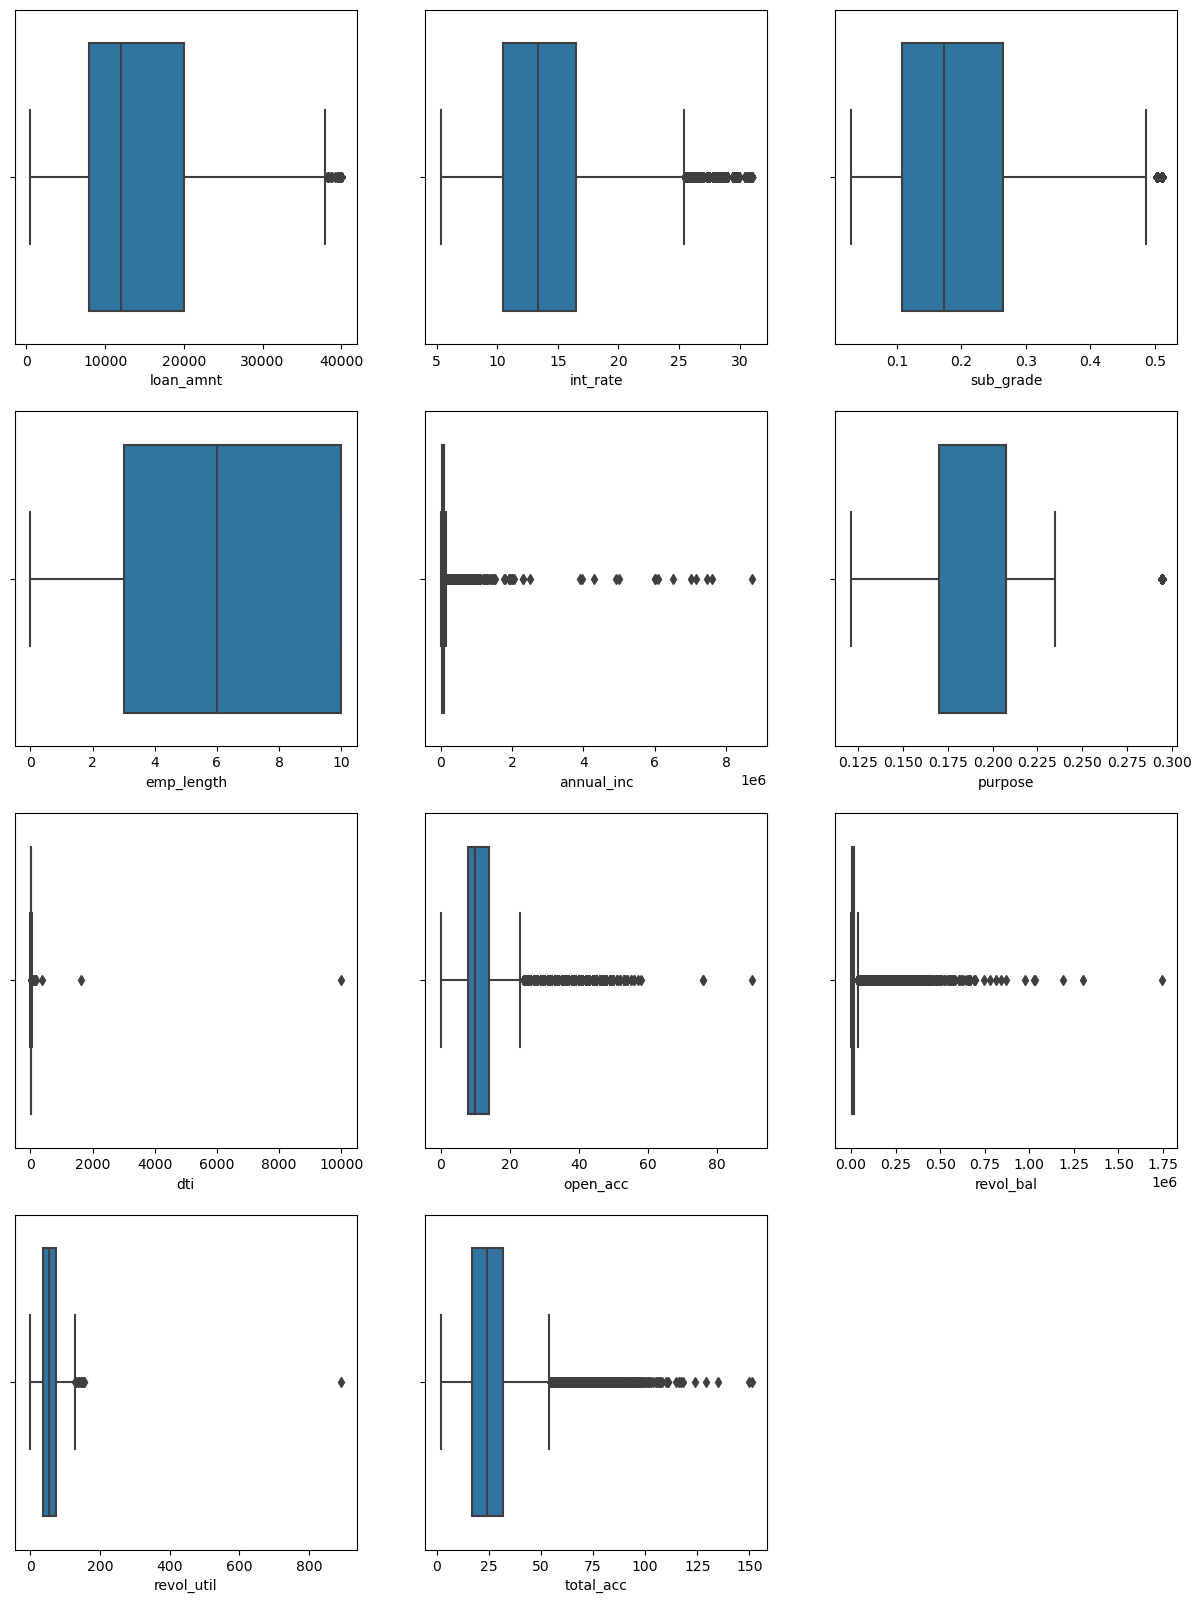

In [692]:
# Box plots of columns

plt.figure(figsize=(15, 20))

for i in range(1,len(cols)+1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=cols[i-1], data=df1)


In [693]:
# Remove Outliers considering those beyond z_score of 3 as outliers

for col in cols:
    mean = df1[col].mean()
    std = df1[col].std()

    upper_limit = mean+3*std
    lower_limit = mean-3*std

    df1 = df1[(df1[col]<upper_limit) & (df1[col]>lower_limit)]

df1.shape

(371458, 26)

### Data Preparation for Modeling -

In [694]:
X = df1.drop('loan_status', axis=1)
y = df1['loan_status']

#### MinMaxScaler -

For each value in a feature, MinMaxScaler subtracts the minimum value in the feature and then divides by the range. The range is the difference between the original maximum and original minimum.

MinMaxScaler preserves the shape of the original distribution. It doesn’t meaningfully change the information embedded in the original data.

In [695]:
scaler = MinMaxScaler()
X_sc = scaler.fit_transform(X)

In [696]:
X_sc = pd.DataFrame(X_sc,columns=X.columns)

In [697]:
X_sc

,loan_amnt,int_rate,grade,sub_grade,emp_length,annual_inc,purpose,dti,open_acc,pub_rec,...,zip,term_ 60 months,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT
0,0.247880,0.282418,0.151264,0.231230,1.0,0.444882,0.544711,0.367507,0.615385,0.0,...,0.193784,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0.195695,0.307799,0.151264,0.266309,0.4,0.240157,0.726533,0.308824,0.653846,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.393999,0.238579,0.151264,0.199535,0.0,0.153768,0.323543,0.179132,0.500000,0.0,...,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,0.174821,0.053992,0.000000,0.041117,0.6,0.196850,0.323543,0.036415,0.230769,0.0,...,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.622962,0.551454,0.358427,0.456049,0.9,0.200787,0.323543,0.475490,0.500000,0.0,...,1.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371453,0.247880,0.261652,0.151264,0.231230,0.2,0.141732,0.726533,0.218908,0.230769,0.0,...,0.194903,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
371454,0.534899,0.321643,0.358427,0.305633,0.5,0.417323,0.726533,0.300420,0.230769,0.0,...,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
371455,0.117417,0.215505,0.151264,0.147327,1.0,0.206693,0.726533,0.245938,0.576923,0.0,...,0.195630,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
371456,0.534899,0.461006,0.358427,0.355842,1.0,0.236220,0.726533,0.222409,0.346154,0.0,...,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [698]:
deleted_cols=[]
def VIF(X_sc):
    vif=pd.DataFrame()
    vif['Features']=X_sc.columns
    vif['VIF']=[variance_inflation_factor(X_sc,i) for i in range(X_sc.shape[1])]
    vif['VIF']=round(vif['VIF'],2)
    vif=vif.sort_values(by='VIF',ascending=False).reset_index()
    print('**************************************************')
    print(vif)
    print('**************************************************')
    if vif['VIF'][0]>=10:
        deleted_cols.append(vif['Features'][0])
        X_sc.drop(vif['Features'][0],inplace=True,axis=1)
        VIF(X_sc)
    return (X_sc,deleted_cols)

X_sc,deleted_cols=VIF(X_sc)
print("Removed Features : " , len(deleted_cols))

**************************************************
    index                             Features     VIF
0       3                            sub_grade  139.43
1       1                             int_rate   82.19
2       2                                grade   59.13
3      23          application_type_INDIVIDUAL   35.78
4       8                             open_acc   13.64
5      12                            total_acc   10.67
6       6                              purpose   10.54
7      11                           revol_util    9.01
8       7                                  dti    8.00
9       5                           annual_inc    7.36
10      0                            loan_amnt    6.68
11      9                              pub_rec    4.96
12     10                            revol_bal    4.75
13     14                 pub_rec_bankruptcies    4.75
14      4                           emp_length    3.99
15     13                             mort_acc    3.92
16     19     

In [777]:
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.20,
                                                     random_state=42)

In [778]:
print(X_train.shape)
print(X_test.shape)

(297166, 21)
(74292, 21)


In [780]:
y_train.value_counts()

0.0    239177
1.0     57989
Name: loan_status, dtype: int64

In [782]:
smt=SMOTE()
X_train_sm,y_train_sm=smt.fit_resample(X_train,y_train)

In [783]:
y_train_sm.value_counts()

1.0    239177
0.0    239177
Name: loan_status, dtype: int64

### Logistic Regression - Base Model

In [784]:
logreg = LogisticRegression()
logreg.fit(X_train_sm, y_train_sm)

LogisticRegression()

In [785]:
y_pred = logreg.predict(X_test)
print('Accuracy of Logistic Regression Classifier on test set: {:.3f}'.format(logreg.score(X_test, y_test)))

Accuracy of Logistic Regression Classifier on test set: 0.807


#### Confusion Matrix -

In [786]:
confusionmatrix = confusion_matrix(y_test, y_pred)
confusionmatrix

array([[48512, 11279],
       [ 3043, 11458]], dtype=int64)

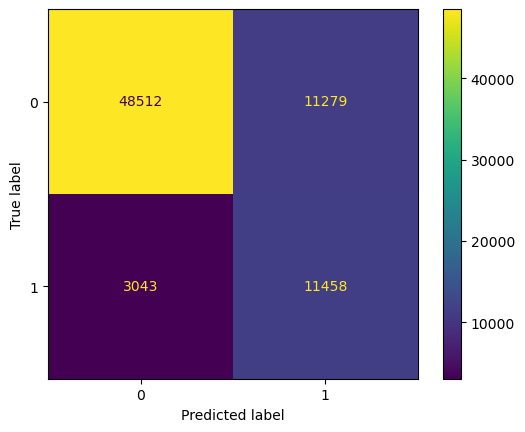

In [787]:
ConfusionMatrixDisplay(confusionmatrix).plot()

TP --> 11458 <br>
TN --> 48512 <br>
FP --> 11279 <br>
FN --> 3043 

#### Metric Calculation -

In [790]:
acc = np.round(np.diag(confusionmatrix).sum()/np.sum(confusionmatrix),2)
prec = np.round(confusionmatrix[1,1]/np.sum(confusionmatrix[:,1:]),2)
rec = np.round(confusionmatrix[1,1]/np.sum(confusionmatrix[1:,:]),2)
tnr = np.round(confusionmatrix[0,0]/np.sum(confusionmatrix[0,:]),2)
fpr = np.round(confusionmatrix[0,1]/np.sum(confusionmatrix[0,:]),2)
f1 = np.round(2*prec*rec / (prec + rec),2)

print(f'Accuracy --> {acc}\nPrecision --> {prec}\nRecall --> {rec} \
\nTrue Negative Rate --> {tnr}\nFalse Positive Rate --> {fpr}\nF1 Score --> {f1}')

Accuracy --> 0.81
Precision --> 0.5
Recall --> 0.79 
True Negative Rate --> 0.81
False Positive Rate --> 0.19
F1 Score --> 0.61


#### Classification Report -

In [791]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.81      0.87     59791
         1.0       0.50      0.79      0.62     14501

    accuracy                           0.81     74292
   macro avg       0.72      0.80      0.74     74292
weighted avg       0.86      0.81      0.82     74292



#### ROC Curve -

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

- True Positive Rate
- False Positive Rate

True Positive Rate (TPR) is a synonym for recall and is therefore defined as follows:

- TPR=(TP)/(TP+FN)

False Positive Rate (FPR) is defined as follows:

- FPR=(FP)/(FP+TN)

An ROC curve plots TPR vs. FPR at different classification thresholds. Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives. The following figure shows a typical ROC curve.

#### AUC (Area under the ROC Curve) -

AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1).


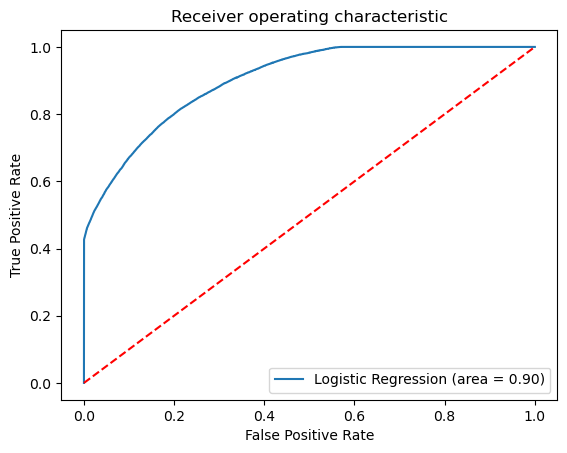

In [739]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

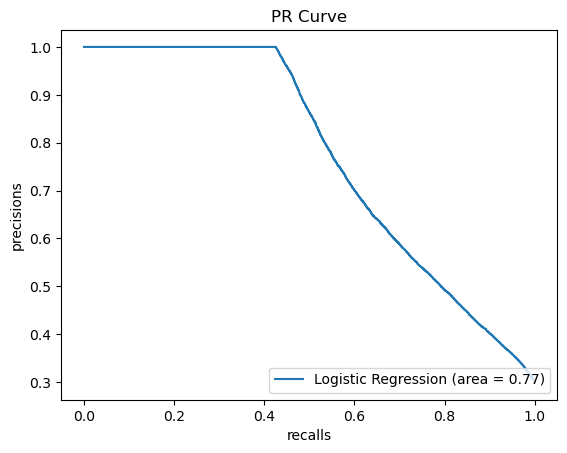

In [740]:
precisions, recalls, thresholds = precision_recall_curve(y_test, logreg.predict_proba(X_test)[:,1])
logit_auc = auc(recalls, precisions)
plt.figure()
plt.plot(recalls, precisions, label='Logistic Regression (area = %0.2f)' % logit_auc)

plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('PR Curve')
plt.legend(loc="lower right")

plt.show()

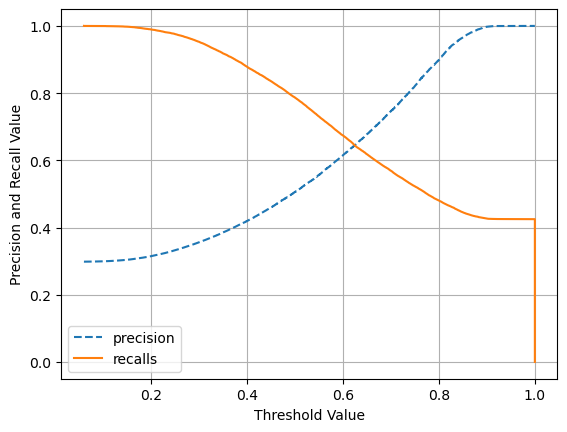

In [741]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    threshold_boundary = thresholds.shape[0]
    # plot precision
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    # plot recall
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recalls')

    plt.xlabel('Threshold Value')
    plt.ylabel('Precision and Recall Value')
    plt.legend()
    plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, logreg.predict_proba(X_test)[:,1])

### PRIORITIZING METRICS

**Recall :** <br>
In credit default cases, it is very important that there are very less cases where the model has predicted as **NOT A DEFAULTER** but the person has actually **DEFAULTED** in credit payments. This is highly risky. 
Thus the **FALSE NEGATIVES (FN)** should be minimal. <br>
Recall is the metric related to False Negatives (FN) ie, Recall = TP/(TP+FN) and hence needs to be minimum possible and thus **Recall is the first priority metric** <br>
**Precision :** <br>
It is also important that there are less cases where the model predicted as **DEFAULTER** but the person actually is **NOT A DEFAULTER** because it might result in missing out on customers and thereby reduction in the total revenue. Thus **FALSE POSITIVES** also should be minimal. <br>
Precision is the metric related to False Positives (FP) ie, Precision = TP/(TP+FP) and hence needs to be minimum possible and hence **Precision will be the second priority metric**

Recall score achieved with the base model is 80% which is a decent score but precision is at 50%. Since the precision score is low, hyper parameter tuning will be done to improve the scores from the base model

### HYPER PARAMETER TUNING

In [833]:
logreg=LogisticRegression()
param_grid={
 
    'C' : [90,100,110],
    'max_iter' : [340,350,360]
}

grid = GridSearchCV(estimator=logreg,param_grid=param_grid,cv=5,scoring='recall')
grid.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [90, 100, 110], 'max_iter': [340, 350, 360]},
             scoring='recall')

In [834]:
grid.best_params_

{'C': 100, 'max_iter': 340}

### Logistic Regression - Tuned Model

In [835]:
logreg = LogisticRegression(max_iter=340,C=100)
logreg.fit(X_train_sm, y_train_sm)

LogisticRegression(C=100, max_iter=340)

In [836]:
y_pred = logreg.predict(X_test)
print('Accuracy of Logistic Regression Classifier on test set: {:.3f}'.format(logreg.score(X_test, y_test)))

Accuracy of Logistic Regression Classifier on test set: 0.806


#### Confusion Matrix -

In [837]:
confusionmatrix = confusion_matrix(y_test, y_pred)
confusionmatrix

array([[48455, 11336],
       [ 3054, 11447]], dtype=int64)

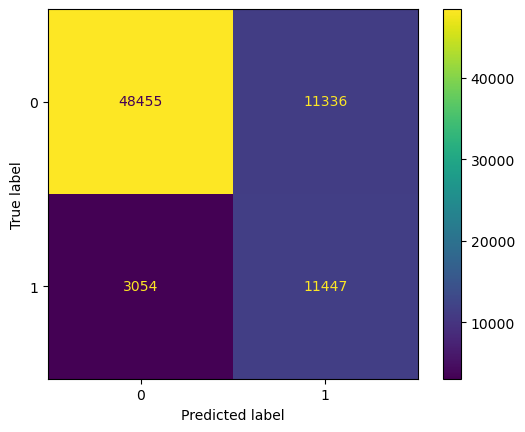

In [838]:
ConfusionMatrixDisplay(confusionmatrix).plot()

TP --> 17122 <br>
TN --> 72878 <br>
FP --> 16813 <br>
FN --> 4625 

#### Metric Calculation -

In [839]:
acc = np.round(np.diag(confusionmatrix).sum()/np.sum(confusionmatrix),2)
prec = np.round(confusionmatrix[1,1]/np.sum(confusionmatrix[:,1:]),2)
rec = np.round(confusionmatrix[1,1]/np.sum(confusionmatrix[1:,:]),2)
tnr = np.round(confusionmatrix[0,0]/np.sum(confusionmatrix[0,:]),2)
fpr = np.round(confusionmatrix[0,1]/np.sum(confusionmatrix[0,:]),2)
f1 = np.round(2*prec*rec / (prec + rec),2)

print(f'Accuracy --> {acc}\nPrecision --> {prec}\nRecall --> {rec} \
\nTrue Negative Rate --> {tnr}\nFalse Positive Rate --> {fpr}\nF1 Score --> {f1}')

Accuracy --> 0.81
Precision --> 0.5
Recall --> 0.79 
True Negative Rate --> 0.81
False Positive Rate --> 0.19
F1 Score --> 0.61


#### Classification Report -

In [840]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.81      0.87     59791
         1.0       0.50      0.79      0.61     14501

    accuracy                           0.81     74292
   macro avg       0.72      0.80      0.74     74292
weighted avg       0.86      0.81      0.82     74292



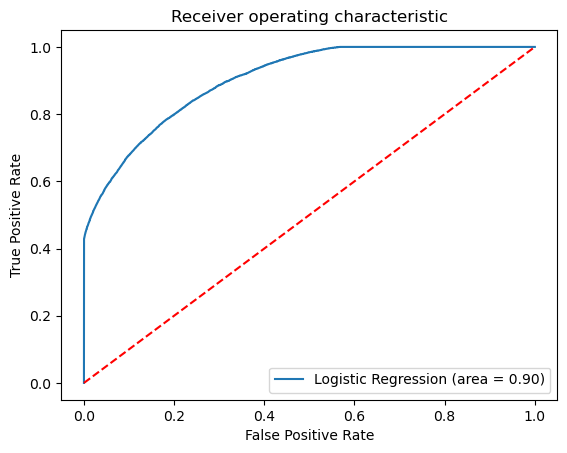

In [841]:
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
logit_roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

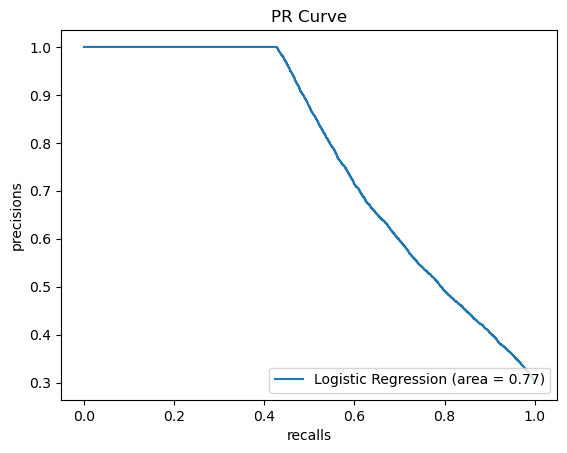

In [842]:
precisions, recalls, thresholds = precision_recall_curve(y_test, logreg.predict_proba(X_test)[:,1])
logit_auc = auc(recalls, precisions)
plt.figure()
plt.plot(recalls, precisions, label='Logistic Regression (area = %0.2f)' % logit_auc)

plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('PR Curve')
plt.legend(loc="lower right")

plt.show()

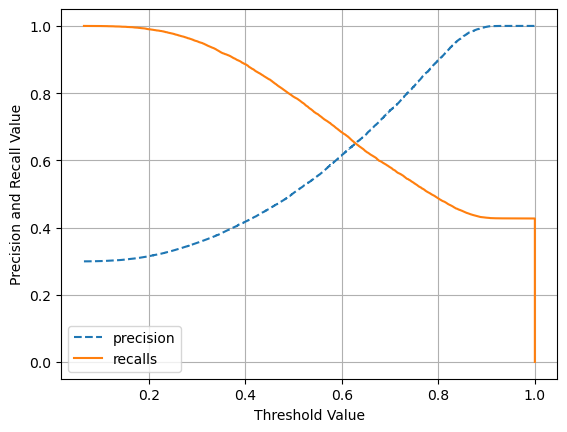

In [843]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    logit_roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])
    
    threshold_boundary = thresholds.shape[0]
    # plot precision
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    # plot recall
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recalls')

    plt.xlabel('Threshold Value')
    plt.ylabel('Precision and Recall Value')
    plt.legend()
    plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, logreg.predict_proba(X_test)[:,1])

### FEATURE IMPORTANCES

In logistic regression, when multi-collinearity is removed, feature importance can be directly interpreted from weights / coefficients.

In [844]:
fi = pd.DataFrame()
fi['Coefficients'] = logreg.coef_.reshape(-1,)
fi['Features'] = X_train.columns
fi.sort_values(by='Coefficients', ascending=False,inplace=True)
fi

,Coefficients,Features
12,39.137932,zip
5,2.137980,dti
1,1.924273,grade
0,0.634837,loan_amnt
8,0.605989,revol_util
13,0.412911,term_ 60 months
6,0.265497,pub_rec
4,0.218153,purpose
16,0.211767,home_ownership_RENT
17,0.199987,verification_status_Source Verified


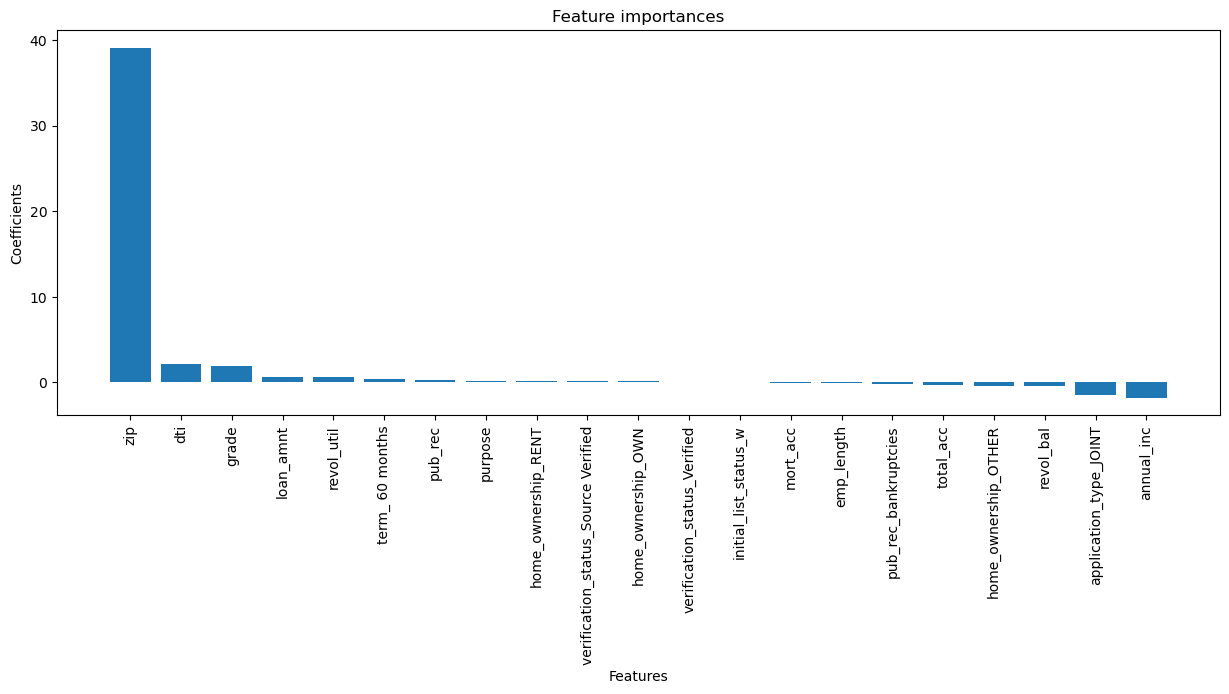

In [846]:
plt.figure(figsize=(15,5))

plt.bar(x=fi['Features'], height=fi['Coefficients'])
plt.xticks(rotation=90)
plt.title('Feature importances')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.show()

### INSIGHTS AND RECOMMENDATIONS

1. Close to 3.2 lakh people (80%) paid back their loan while 78k loans (20%) were charged off
2. People with '36 month loan term', home ownership of 'Mortgage' or 'Rent' , purpose of 'debt consolidation' or 'credit cards' has higher chance of paying pack the loan
3. For the loans which are defaulted interest rates are a bit on the higher side compared to those which are fully repaid.
4. Here since it's important to identify the real defaulters inorder to exclude non performing assets while issuing loans recall is given more importance over precision. If needed, recall value can be further improved by altering threshold probability which by default is 0.5.
4. Since the model is giving a maximum precision value of around 0.5 only even after tweeking the hyperparameter, we will need some advanced bagging or boosting algorithms inorder to improve the model performance.